1. Linear Regression on "wave" dataset

(1) Prepare an example data

"wave" dataset that the textbook provides

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
!pip install mglearn

In [5]:
import mglearn
X, y = mglearn.datasets.make_wave(n_samples=60)

In [6]:
print(X.shape, y.shape)    

(60, 1) (60,)


Text(0, 0.5, 'y (target)')

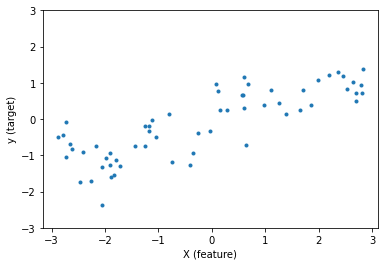

In [7]:
plt.plot(X, y, '.')#(x축, y축,각각의 그림을 어떻게 나타낼 것인지)
plt.ylim(-3, 3) #끝과 끝 범위를 지정
plt.xlabel("X (feature)") #라벨 지정
plt.ylabel("y (target)")

(2) Split the data into training and test sets

In [8]:
from sklearn.model_selection import train_test_split #train과 test set 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

(3) Define and Train a linear regression model

In [9]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()#parameter 없이
reg.fit(X_train, y_train) 

LinearRegression()

In [10]:
print("the resulting coeffients of the linear regression (w1):", reg.coef_)
print("the resulting intercept of the linear regression (w0):", reg.intercept_)

the resulting coeffients of the linear regression (w1): [0.39390555]
the resulting intercept of the linear regression (w0): -0.03180434302675976


w[0]: 0.393906  b: -0.031804


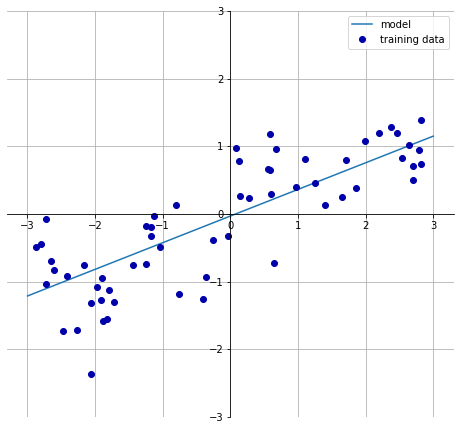

In [11]:
mglearn.plots.plot_linear_regression_wave()

(4) Test and Evaluate the model

In [12]:
y_test_hat = reg.predict(X_test)
print(y_test)
print(y_test_hat)

[-1.18073311 -2.37364735 -0.19612826  0.40012342 -1.30838148  0.65213403
  0.70945882  0.23938228  1.0738403  -1.54664568 -0.02565504  0.73141352
 -1.0767626   1.17396178  1.01581268]
[-0.3283204  -0.84483835 -0.49358667  0.35230624 -0.71167167  0.19957573
  1.02910669  0.07859229  0.75390167 -0.75032857 -0.47681266  1.07802761
 -0.8104986   0.2013684   1.00692209]


In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('MSE : %.4f' % mean_squared_error(y_test, y_test_hat))
print('RMSE : %.4f' % mean_squared_error(y_test, y_test_hat)**0.5)
print('MAE : %.4f' % mean_absolute_error(y_test, y_test_hat))
print('R-square : %.4f' % r2_score(y_test, y_test_hat))

MSE : 0.3947
RMSE : 0.6283
MAE : 0.4945
R-square : 0.6593


2. Linear Regression on Boston Housing Price Data
(1) Prepare the dataset

In [14]:
from sklearn.datasets import load_boston
boston = load_boston()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [15]:
import warnings
warnings.filterwarnings(action='ignore')

In [16]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [17]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [18]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [19]:
X = boston.data
y = boston.target

In [20]:
print(X.shape, y.shape)  # x는 행이 506개 열이 13개로 이루어진 행렬

(506, 13) (506,)


In [21]:
df = pd.DataFrame(boston.data.columns = boston.feature_names)

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (1649344973.py, line 1)

In [22]:
df=

SyntaxError: invalid syntax (3220236241.py, line 1)

(2) Split the data into training and test sets

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [24]:
X_train.shape

(379, 13)

(3) Define and Train a linear regression model

In [25]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [26]:
print("the resulting coeffients of the linear regression (w1): \n", reg.coef_)
print("the resulting intercept of the linear regression (w0):", reg.intercept_)

the resulting coeffients of the linear regression (w1): 
 [-1.28322638e-01  2.95517751e-02  4.88590934e-02  2.77350326e+00
 -1.62388292e+01  4.36875476e+00 -9.24808158e-03 -1.40086668e+00
  2.57761243e-01 -9.95694820e-03 -9.23122944e-01  1.31854199e-02
 -5.17639519e-01]
the resulting intercept of the linear regression (w0): 29.83642016383828


(4) Test and Evaluate the model

In [27]:
y_train_hat = reg.predict(X_train)
y_test_hat = reg.predict(X_test)

print('train RMSE : %.4f' % mean_squared_error(y_train, y_train_hat)**0.5)
print('train MAE : %.4f' % mean_absolute_error(y_train, y_train_hat))
print('train R-square : %.4f' % r2_score(y_train, y_train_hat))

print('test RMSE : %.4f' % mean_squared_error(y_test, y_test_hat)**0.5)
print('test MAE : %.4f' % mean_absolute_error(y_test, y_test_hat))
print('test R-square : %.4f' % r2_score(y_test, y_test_hat))

train RMSE : 4.7265
train MAE : 3.3663
train R-square : 0.7481
test RMSE : 4.7009
test MAE : 3.0609
test R-square : 0.6844


# 2-1. Check the coefficients

here, I'll test if the coefficients agree the equation that we obtained in the lecture : 
(
X
T
X
)
−
1
X
T
y

In [28]:
X_new = np.ones((X_train.shape[0],X_train.shape[1]+1))
X_new[:,1:] = X_train
print(X_new.shape)


(379, 14)


In [29]:
inv = np.linalg.inv(np.dot(X_new.transpose(), X_new))
coeff = inv.dot(X_new.transpose()).dot(y_train)
print("coefficients (w1,w2,...) are : \n", coeff[1:])
print("intercept (w0) is : ", coeff[0])

coefficients (w1,w2,...) are : 
 [-1.28322638e-01  2.95517751e-02  4.88590934e-02  2.77350326e+00
 -1.62388292e+01  4.36875476e+00 -9.24808158e-03 -1.40086668e+00
  2.57761243e-01 -9.95694820e-03 -9.23122944e-01  1.31854199e-02
 -5.17639519e-01]
intercept (w0) is :  29.836420163851976


# 3. Regression for the extened Boston Housing Price dataset

when the number of (useful) features increses, the model performance will be ...

In [30]:
X, y = mglearn.datasets.load_extended_boston()
print(X.shape, y.shape)

(506, 104) (506,)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

y_train_hat = reg.predict(X_train)
y_test_hat = reg.predict(X_test)

print('train RMSE : %.4f' % mean_squared_error(y_train, y_train_hat)**0.5)
print('train MAE : %.4f' % mean_absolute_error(y_train, y_train_hat))
print('train R-square : %.4f' % r2_score(y_train, y_train_hat))

print('test RMSE : %.4f' % mean_squared_error(y_test, y_test_hat)**0.5)
print('test MAE : %.4f' % mean_absolute_error(y_test, y_test_hat))
print('test R-square : %.4f' % r2_score(y_test, y_test_hat))

train RMSE : 2.2119
train MAE : 1.7068
train R-square : 0.9448
test RMSE : 3.9620
test MAE : 2.5832
test R-square : 0.7758


# 4. ** Check the case that n < p

In [32]:
X, y = mglearn.datasets.load_extended_boston()
print(X.shape, y.shape)

(506, 104) (506,)


In [33]:
n = 10 # number of samples
X = X[:n,:]
y = y[:n]
print(X.shape, y.shape)

(10, 104) (10,)


In [34]:
X_new = np.ones((X.shape[0],X.shape[1]+1))
X_new[:,1:] = X

In [35]:
print(X_new.transpose().shape, X_new.shape)

(105, 10) (10, 105)


In [36]:
np.linalg.inv(np.dot(X_new.transpose(), X_new))

LinAlgError: Singular matrix

→
→
 which means 
X
T
X
 does not have inverse

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

y_train_hat = reg.predict(X_train)
y_test_hat = reg.predict(X_test)

print('train RMSE : %.4f' % mean_squared_error(y_train, y_train_hat)**0.5)
print('train MAE : %.4f' % mean_absolute_error(y_train, y_train_hat))
print('train R-square : %.4f' % r2_score(y_train, y_train_hat))

print('test RMSE : %.4f' % mean_squared_error(y_test, y_test_hat)**0.5)
print('test MAE : %.4f' % mean_absolute_error(y_test, y_test_hat))
print('test R-square : %.4f' % r2_score(y_test, y_test_hat))

train RMSE : 0.0000
train MAE : 0.0000
train R-square : 1.0000
test RMSE : 11.6803
test MAE : 10.0467
test R-square : -4.4509
